# Human-Human(Einstein) Hybrid Image Generation

## My observations

### 1. I tried to change frequencies from 5 - 100
### 2. Observable hybird images obtained in frequencies of [20, 25]

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy.fft as fp

import matplotlib.image as mpimg
from PIL import Image
import scipy

from skimage.io import imread
import scipy.fftpack as fftpack

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
PAIR1_IMAGES = ['Image1.png', 'Image2.png']
PAIR2_IMAGES = ['Image3.jpg', 'Image4.png']

In [3]:
# TODO: how to handle RGB images
# TODO: convert to float /255

img1 = cv2.imread(os.path.join('given-images', PAIR1_IMAGES[0]))
# img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(os.path.join('given-images', PAIR1_IMAGES[1]))
# img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

img3 = cv2.imread(os.path.join('given-images', PAIR2_IMAGES[0]))
# img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

img4 = cv2.imread(os.path.join('given-images', PAIR2_IMAGES[1]))
# img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

# General Filter

In [4]:
VERBOSE = True

def normalize(img):
    img_min = img.min()
    img_max = img.max()
    return (img - img_min) / (img_max - img_min)




def freq_filtering(image, filter_type, cut_freq):        
    
    F1 = np.zeros(image.shape).astype(complex)
    F2 = np.zeros(image.shape).astype(complex)
    for channel in range(image.shape[2]):
        
        F1[:, :, channel] = fftpack.fft2((image[:, :, channel]).astype(float))
        F2[:, :, channel] = fftpack.fftshift(F1[:, :, channel])

    (w, h, d) = image.shape
    half_w, half_h = int(w/2), int(h/2)
    
    # filter
    n = cut_freq
    if filter_type == 'low-pass':
        # low-pass filter: only allow first 50x50 (low) frequencies        
        F_mask = np.zeros(image.shape)
        F_mask[half_w-n:half_w+n+1,half_h-n:half_h+n+1, :] = 1

        F2_filtered = F2 * F_mask
    else:
        # high-pass filter: only allow after first 50x50 (low) frequencies     
        F2_filtered = F2.copy()
        F2_filtered[half_w-n: half_w+n+1, half_h-n: half_h+n+1, :] = 0
    
    image123 = np.zeros(image.shape)
    for channel in range(image.shape[2]):
        image123[:, :, channel] = fp.ifft2(fftpack.ifftshift(F2_filtered[:, :, channel])).real

    image123 = normalize(image123)
    
    if VERBOSE:
        plt.figure(figsize=(20, 20))
        plt.subplot(141)
        plt.imshow( image, cmap='jet')
        plt.title('Image'), plt.xticks([]), plt.yticks([])
    
        plt.subplot(142)
        plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray) #, cmap='jet') # cmap=plt.cm.gray
        plt.title('Image Spetrum'), plt.xticks([]), plt.yticks([])
        
        plt.subplot(143)
        plt.imshow( (20*np.log10( 0.1 + F2_filtered)).astype(int), cmap=plt.cm.gray) #, cmap='jet') # cmap=plt.cm.gray
        plt.title('Masked Image Spetrum'), plt.xticks([]), plt.yticks([])

        plt.subplot(144)
        plt.imshow( image123) # , cmap='jet')
        plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
        
    return image123

# Cut-off frequency = 5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image1 :  (400, 400, 3)
Image2 :  (400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Image1 low-pass + Image2 high-pass'), ([], []), ([], []))

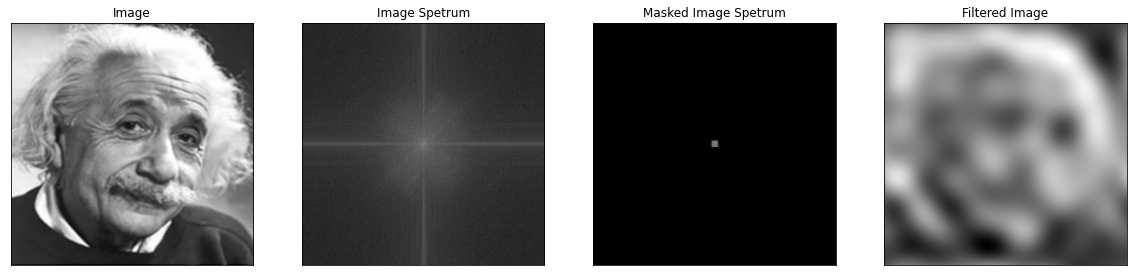

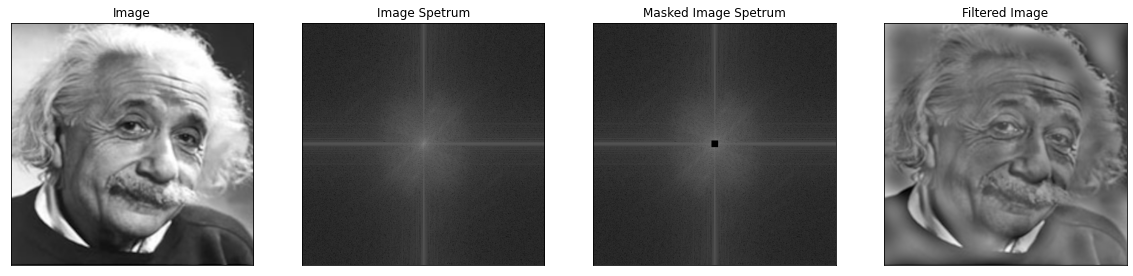

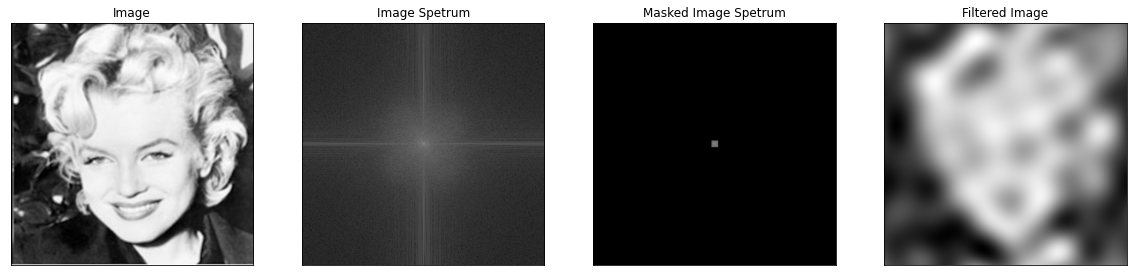

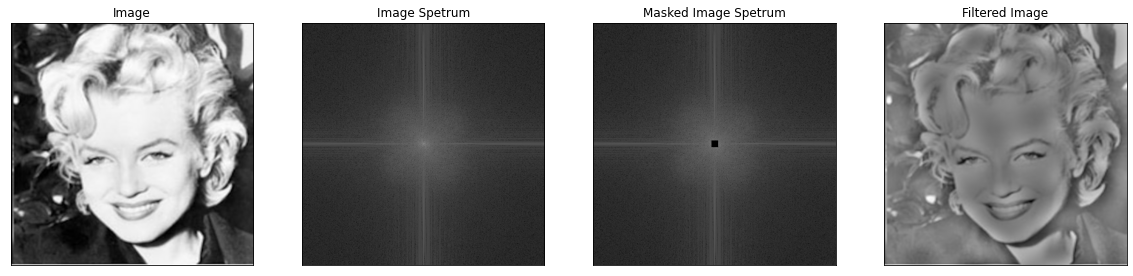

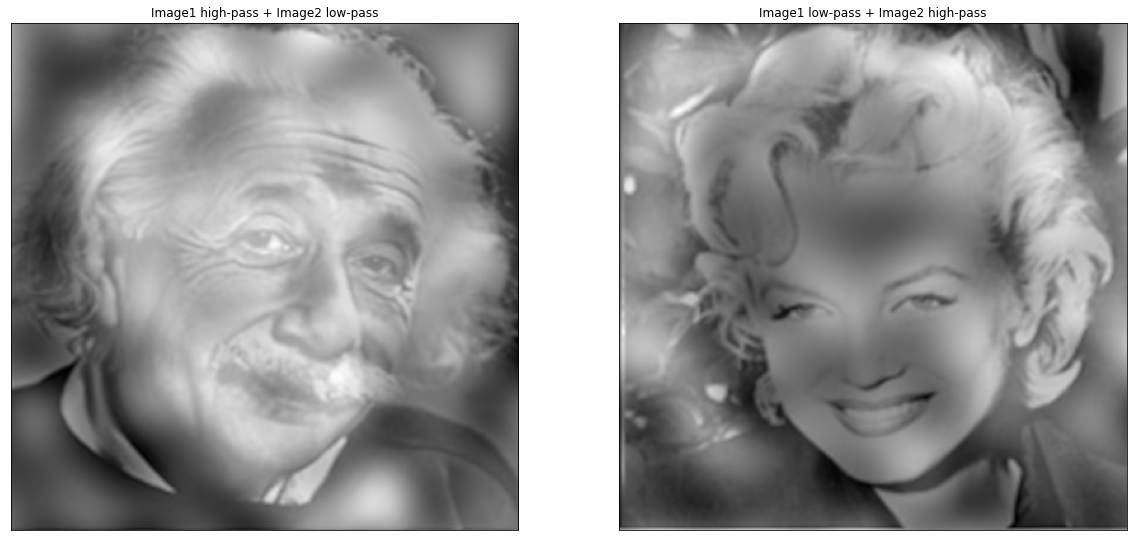

In [6]:
cutoff_frequency = 5

print("Image1 : ", img1.shape)
print("Image2 : ", img2.shape)

# ================================================================================
# ================================== Alignment - resizing
# ================================================================================
img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

img1_lowpass = freq_filtering(img1, 'low-pass', cutoff_frequency)
img1_highpass = freq_filtering(img1, 'high-pass', cutoff_frequency)

img2_lowpass = freq_filtering(img2, 'low-pass', cutoff_frequency)
img2_highpass = freq_filtering(img2, 'high-pass', cutoff_frequency)

img12_high_low =  img1_highpass + img2_lowpass
img12_low_high =  img1_lowpass + img2_highpass

img12_high_low = normalize(img12_high_low)
img12_low_high = normalize(img12_low_high)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow( img12_high_low, cmap='jet')
plt.title('Image1 high-pass + Image2 low-pass'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow( img12_low_high, cmap='jet')
plt.title('Image1 low-pass + Image2 high-pass'), plt.xticks([]), plt.yticks([])

# Cut-off frequency = 10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image1 :  (400, 400, 3)
Image2 :  (400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Image1 low-pass + Image2 high-pass'), ([], []), ([], []))

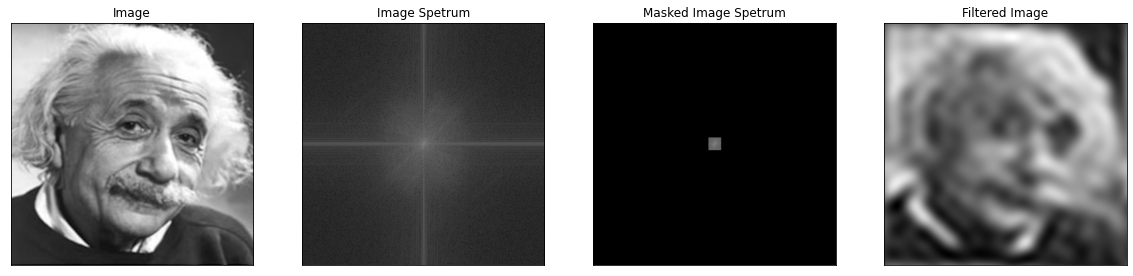

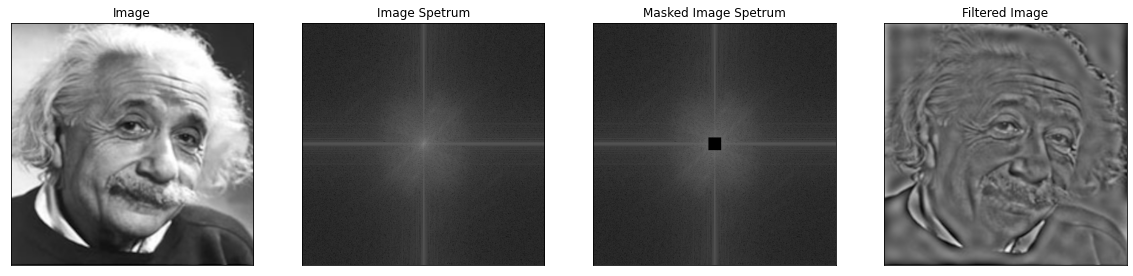

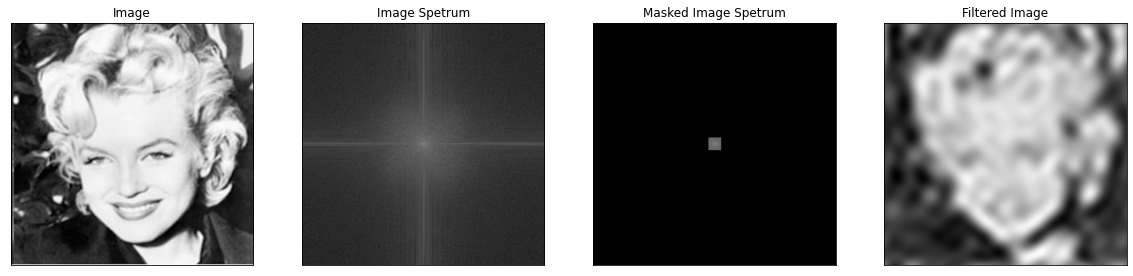

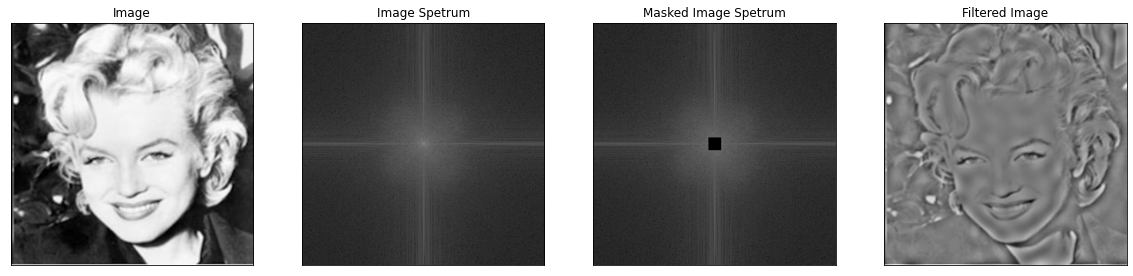

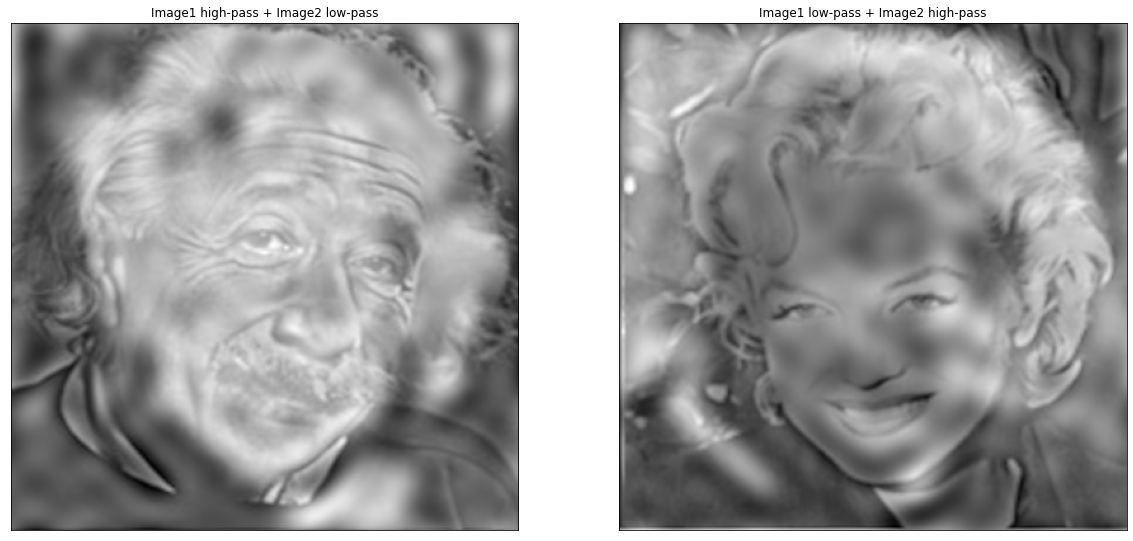

In [7]:
cutoff_frequency = 10

print("Image1 : ", img1.shape)
print("Image2 : ", img2.shape)

# ================================================================================
# ================================== Alignment - resizing
# ================================================================================
img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

img1_lowpass = freq_filtering(img1, 'low-pass', cutoff_frequency)
img1_highpass = freq_filtering(img1, 'high-pass', cutoff_frequency)

img2_lowpass = freq_filtering(img2, 'low-pass', cutoff_frequency)
img2_highpass = freq_filtering(img2, 'high-pass', cutoff_frequency)

img12_high_low =  img1_highpass + img2_lowpass
img12_low_high =  img1_lowpass + img2_highpass

img12_high_low = normalize(img12_high_low)
img12_low_high = normalize(img12_low_high)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow( img12_high_low, cmap='jet')
plt.title('Image1 high-pass + Image2 low-pass'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow( img12_low_high, cmap='jet')
plt.title('Image1 low-pass + Image2 high-pass'), plt.xticks([]), plt.yticks([])

# Cut-off frequency = 15

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image1 :  (400, 400, 3)
Image2 :  (400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Image1 low-pass + Image2 high-pass'), ([], []), ([], []))

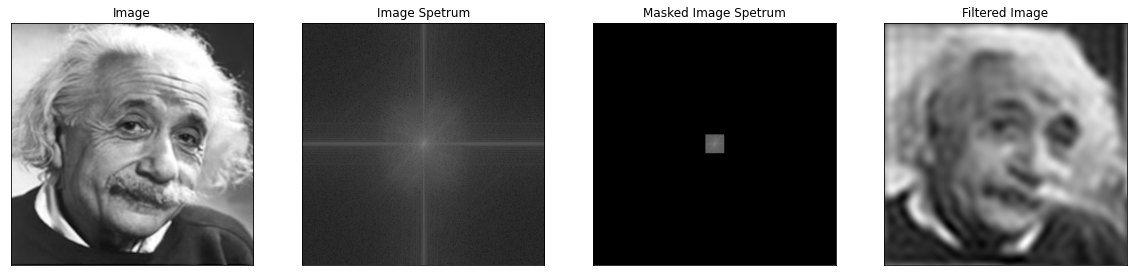

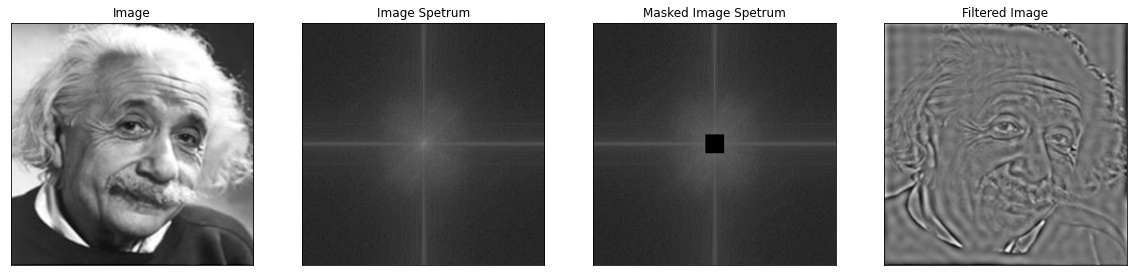

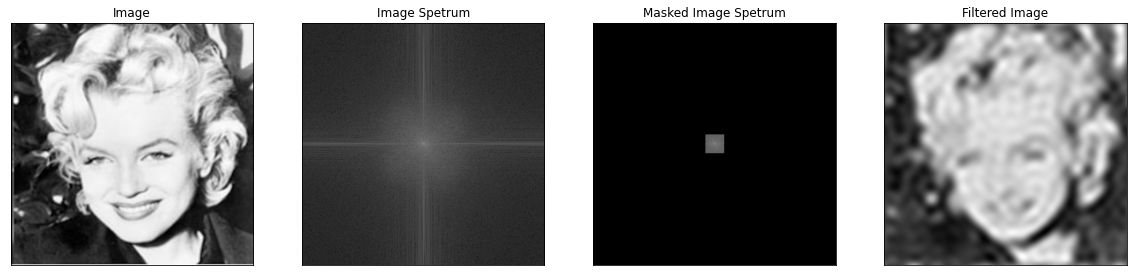

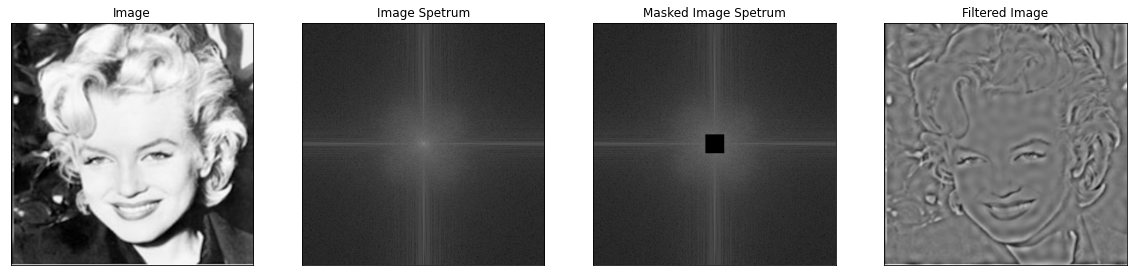

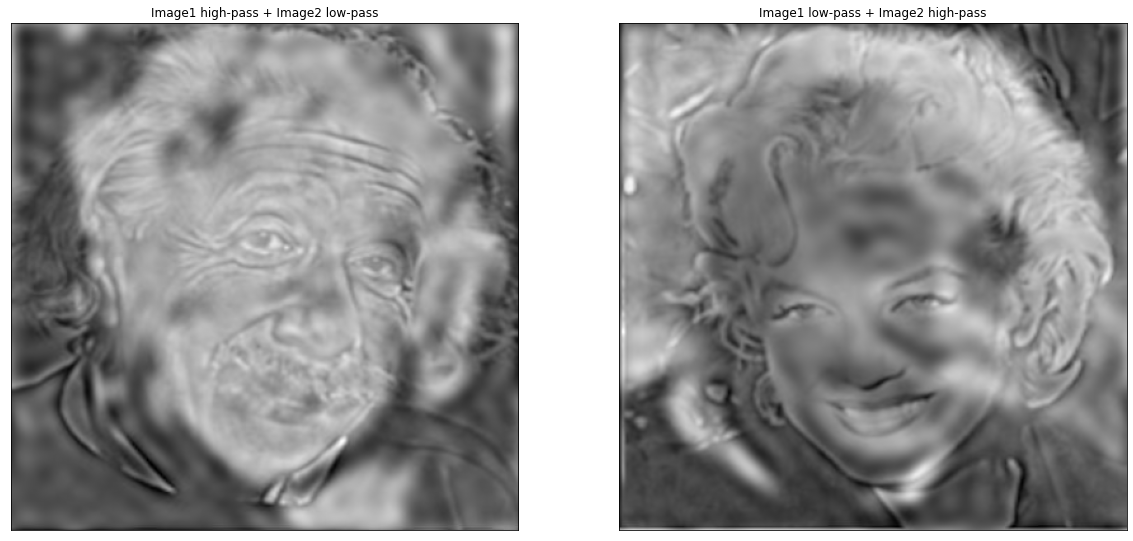

In [8]:
cutoff_frequency = 15

print("Image1 : ", img1.shape)
print("Image2 : ", img2.shape)

# ================================================================================
# ================================== Alignment - resizing
# ================================================================================
img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

img1_lowpass = freq_filtering(img1, 'low-pass', cutoff_frequency)
img1_highpass = freq_filtering(img1, 'high-pass', cutoff_frequency)

img2_lowpass = freq_filtering(img2, 'low-pass', cutoff_frequency)
img2_highpass = freq_filtering(img2, 'high-pass', cutoff_frequency)

img12_high_low =  img1_highpass + img2_lowpass
img12_low_high =  img1_lowpass + img2_highpass

img12_high_low = normalize(img12_high_low)
img12_low_high = normalize(img12_low_high)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow( img12_high_low, cmap='jet')
plt.title('Image1 high-pass + Image2 low-pass'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow( img12_low_high, cmap='jet')
plt.title('Image1 low-pass + Image2 high-pass'), plt.xticks([]), plt.yticks([])

# Cut-off frequency = 20

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image1 :  (400, 400, 3)
Image2 :  (400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Image1 low-pass + Image2 high-pass'), ([], []), ([], []))

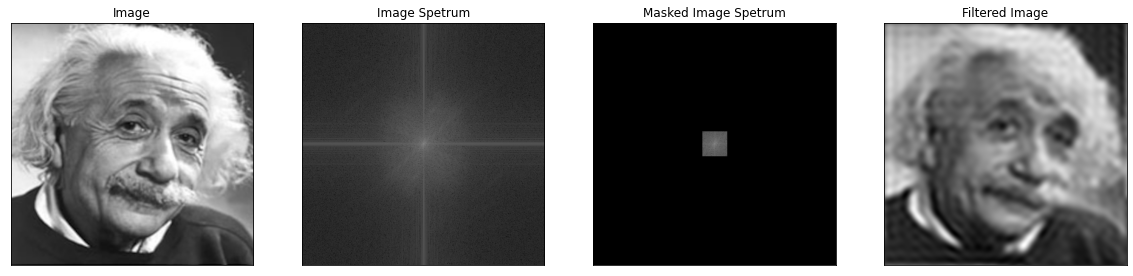

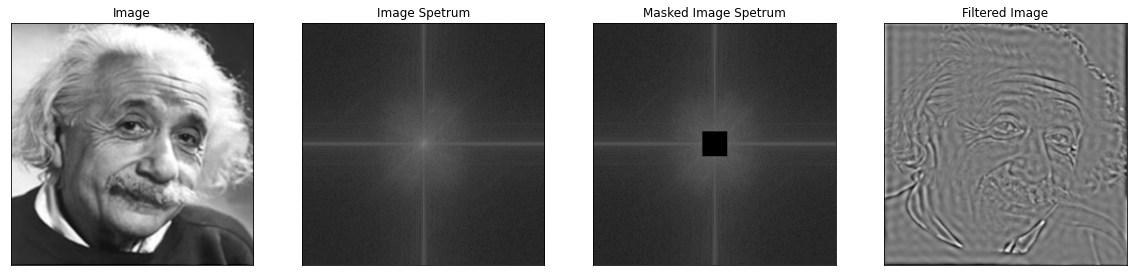

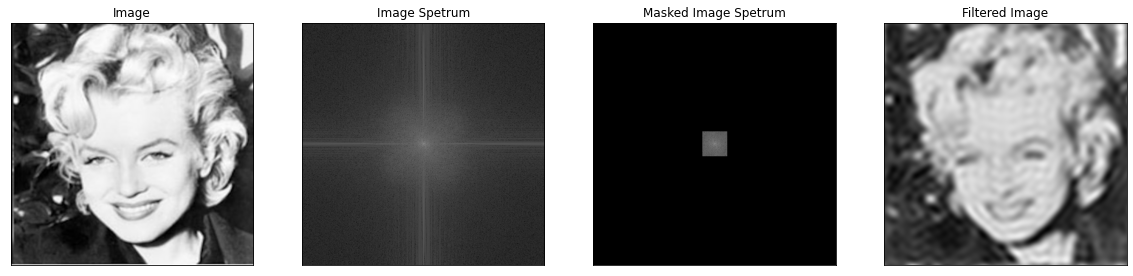

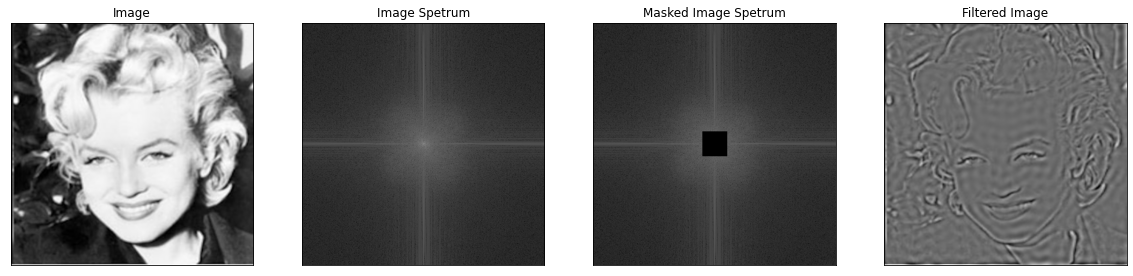

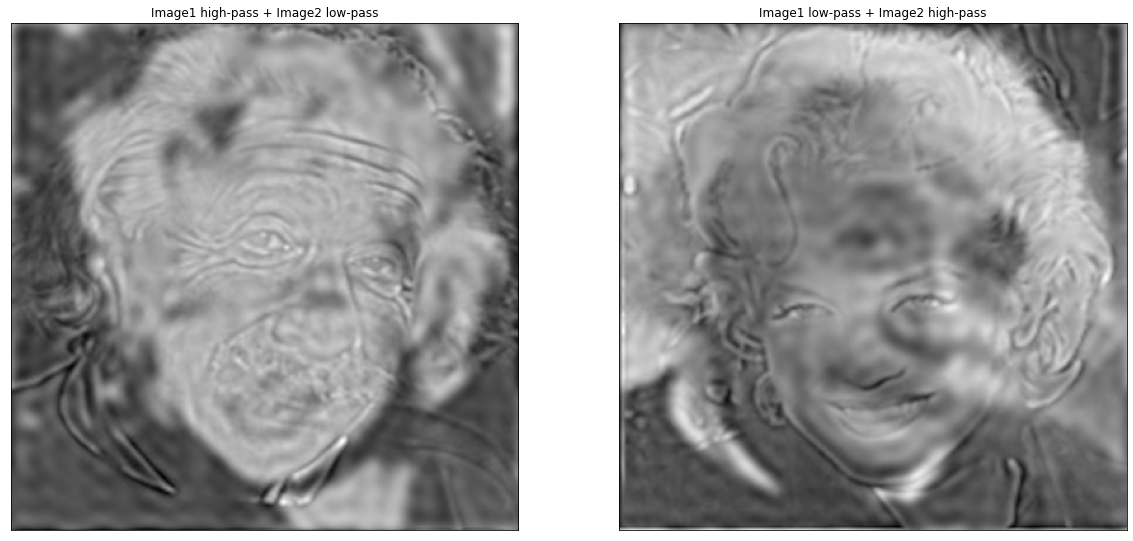

In [9]:
cutoff_frequency = 20

print("Image1 : ", img1.shape)
print("Image2 : ", img2.shape)

# ================================================================================
# ================================== Alignment - resizing
# ================================================================================
img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

img1_lowpass = freq_filtering(img1, 'low-pass', cutoff_frequency)
img1_highpass = freq_filtering(img1, 'high-pass', cutoff_frequency)

img2_lowpass = freq_filtering(img2, 'low-pass', cutoff_frequency)
img2_highpass = freq_filtering(img2, 'high-pass', cutoff_frequency)

img12_high_low =  img1_highpass + img2_lowpass
img12_low_high =  img1_lowpass + img2_highpass

img12_high_low = normalize(img12_high_low)
img12_low_high = normalize(img12_low_high)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow( img12_high_low, cmap='jet')
plt.title('Image1 high-pass + Image2 low-pass'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow( img12_low_high, cmap='jet')
plt.title('Image1 low-pass + Image2 high-pass'), plt.xticks([]), plt.yticks([])

# Cut-off frequency = 25

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image1 :  (400, 400, 3)
Image2 :  (400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Image1 low-pass + Image2 high-pass'), ([], []), ([], []))

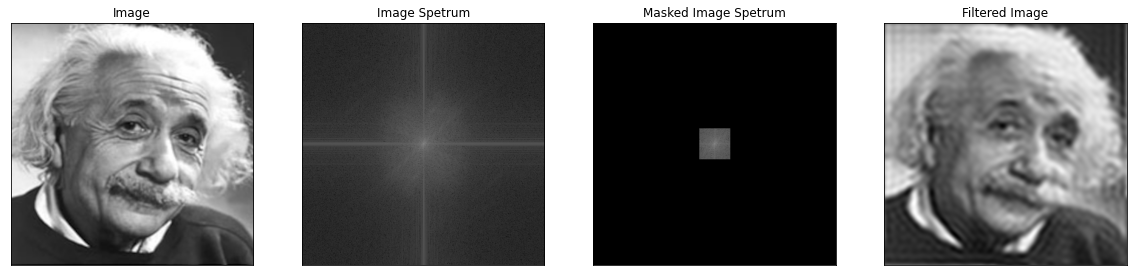

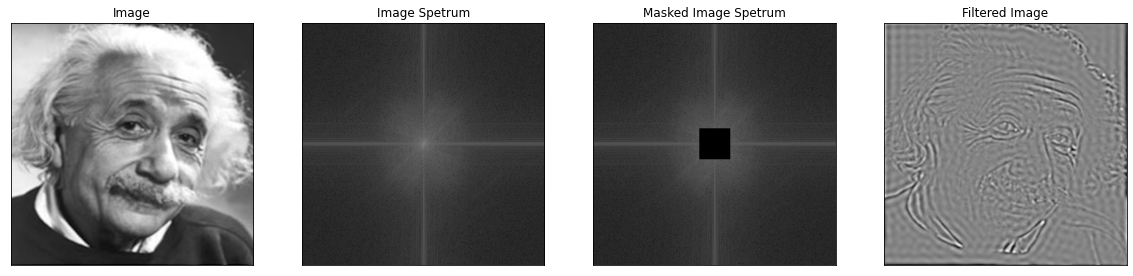

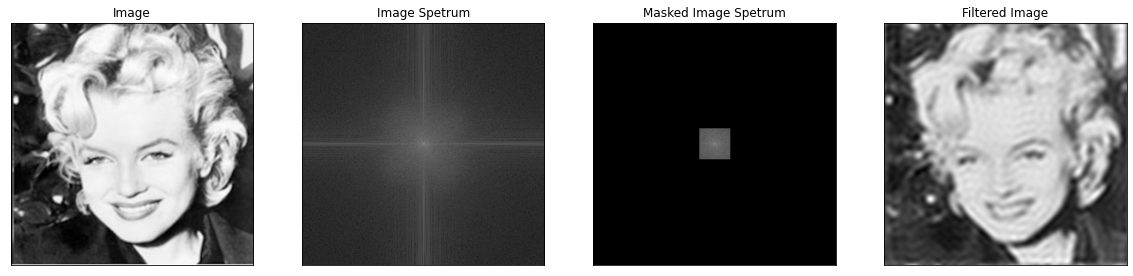

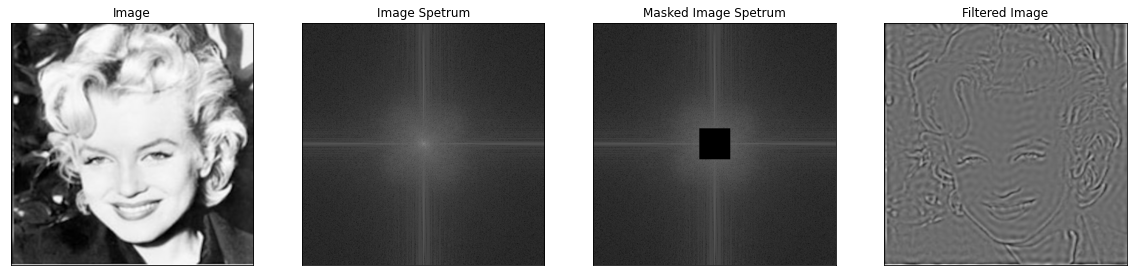

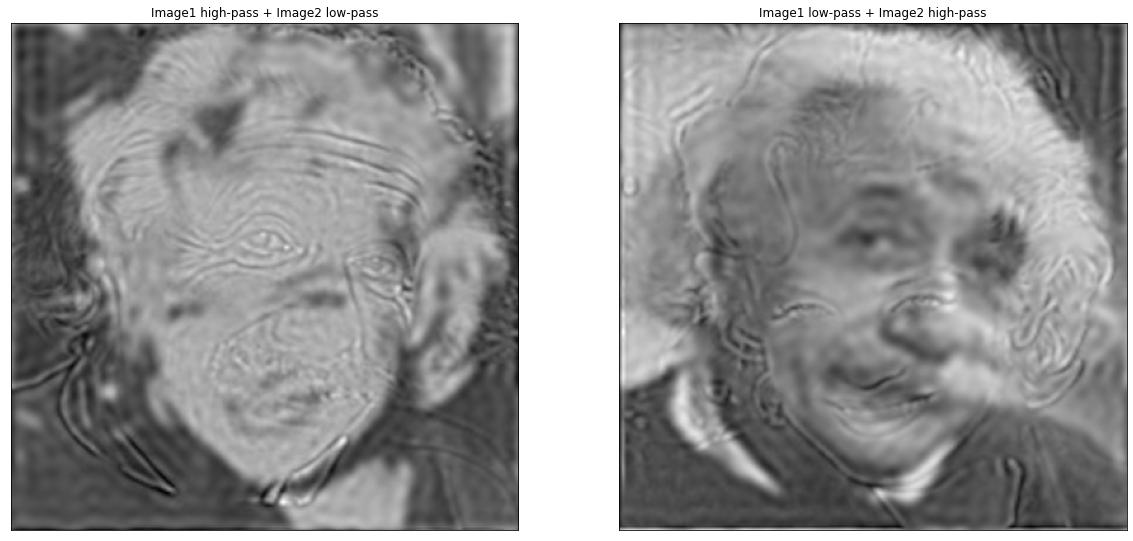

In [10]:
cutoff_frequency = 25

print("Image1 : ", img1.shape)
print("Image2 : ", img2.shape)

# ================================================================================
# ================================== Alignment - resizing
# ================================================================================
img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

img1_lowpass = freq_filtering(img1, 'low-pass', cutoff_frequency)
img1_highpass = freq_filtering(img1, 'high-pass', cutoff_frequency)

img2_lowpass = freq_filtering(img2, 'low-pass', cutoff_frequency)
img2_highpass = freq_filtering(img2, 'high-pass', cutoff_frequency)

img12_high_low =  img1_highpass + img2_lowpass
img12_low_high =  img1_lowpass + img2_highpass

img12_high_low = normalize(img12_high_low)
img12_low_high = normalize(img12_low_high)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow( img12_high_low, cmap='jet')
plt.title('Image1 high-pass + Image2 low-pass'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow( img12_low_high, cmap='jet')
plt.title('Image1 low-pass + Image2 high-pass'), plt.xticks([]), plt.yticks([])

# Cut-off frequency = 50

Image1 :  (400, 400, 3)
Image2 :  (400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Image1 low-pass + Image2 high-pass'), ([], []), ([], []))

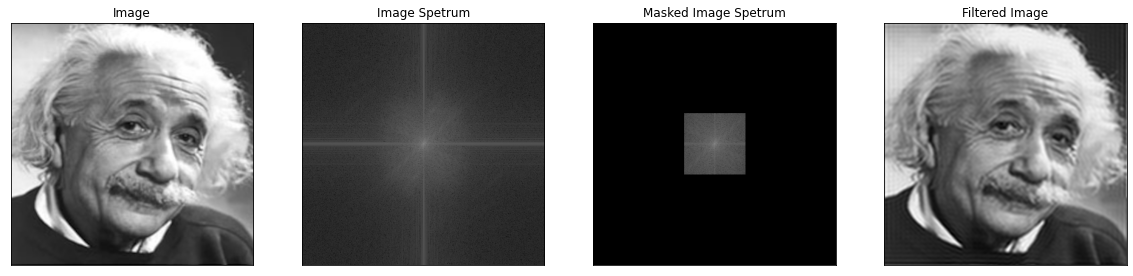

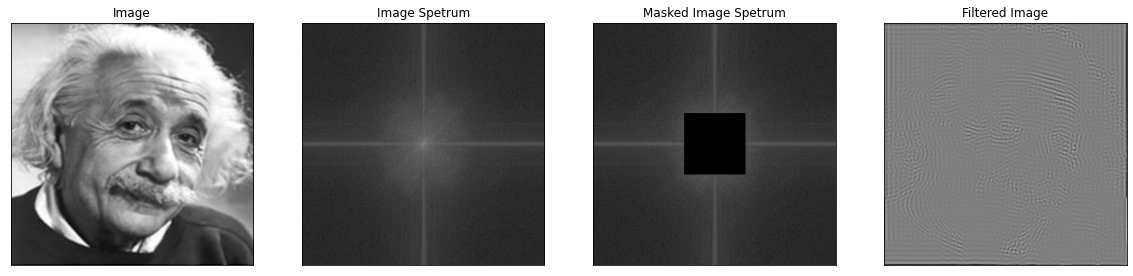

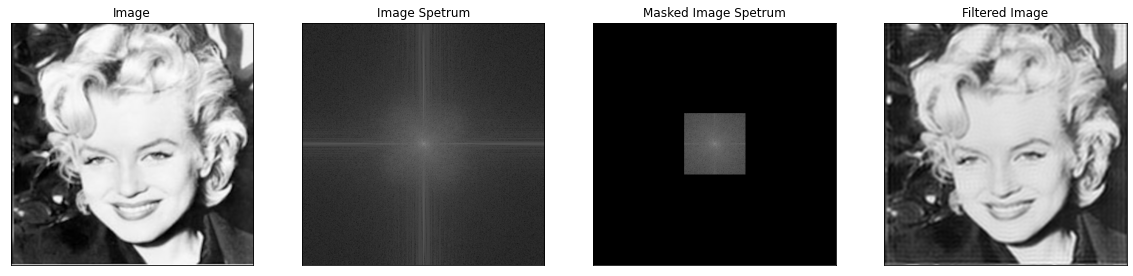

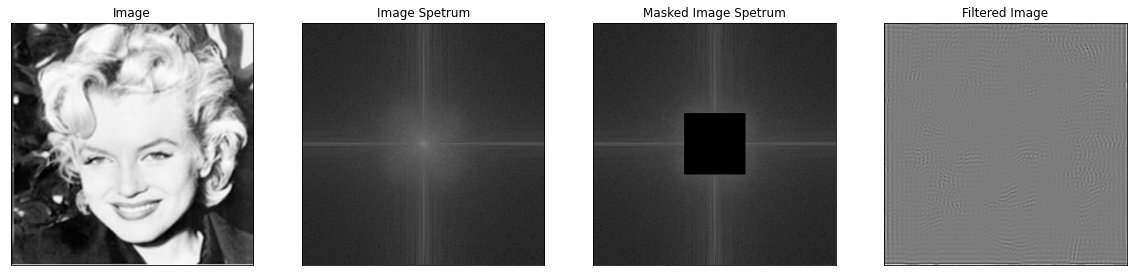

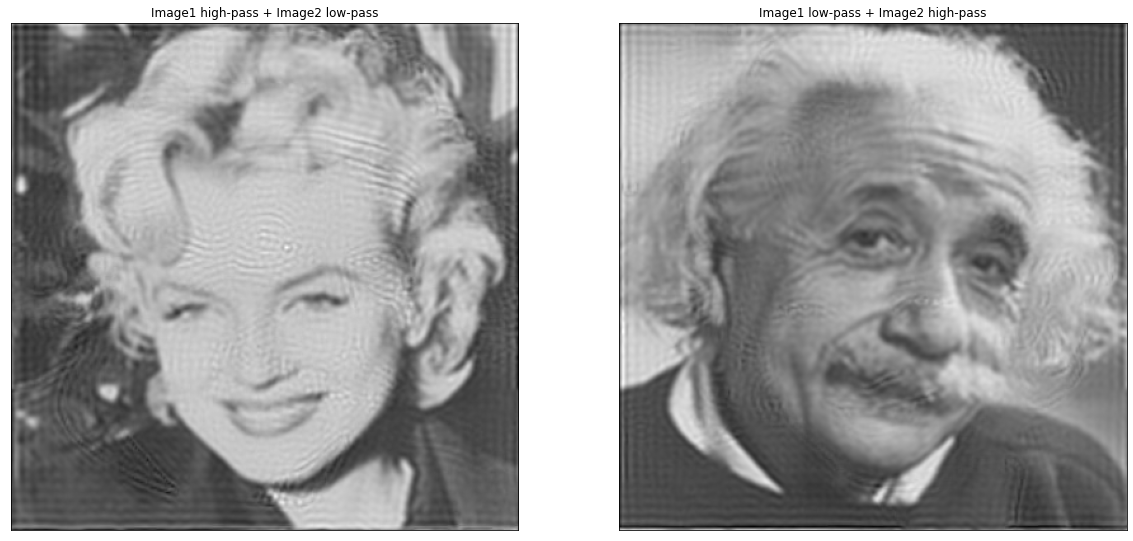

In [11]:
cutoff_frequency = 50

print("Image1 : ", img1.shape)
print("Image2 : ", img2.shape)

# ================================================================================
# ================================== Alignment - resizing
# ================================================================================
img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

img1_lowpass = freq_filtering(img1, 'low-pass', cutoff_frequency)
img1_highpass = freq_filtering(img1, 'high-pass', cutoff_frequency)

img2_lowpass = freq_filtering(img2, 'low-pass', cutoff_frequency)
img2_highpass = freq_filtering(img2, 'high-pass', cutoff_frequency)

img12_high_low =  img1_highpass + img2_lowpass
img12_low_high =  img1_lowpass + img2_highpass

img12_high_low = normalize(img12_high_low)
img12_low_high = normalize(img12_low_high)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow( img12_high_low, cmap='jet')
plt.title('Image1 high-pass + Image2 low-pass'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow( img12_low_high, cmap='jet')
plt.title('Image1 low-pass + Image2 high-pass'), plt.xticks([]), plt.yticks([])

# Cut-off frequency = 100

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image1 :  (400, 400, 3)
Image2 :  (400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Image1 low-pass + Image2 high-pass'), ([], []), ([], []))

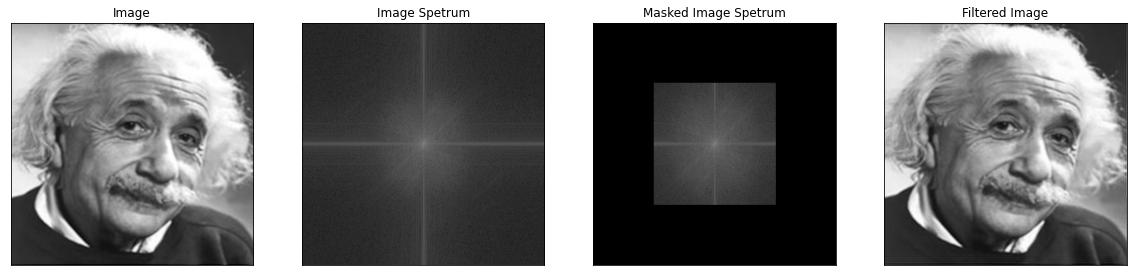

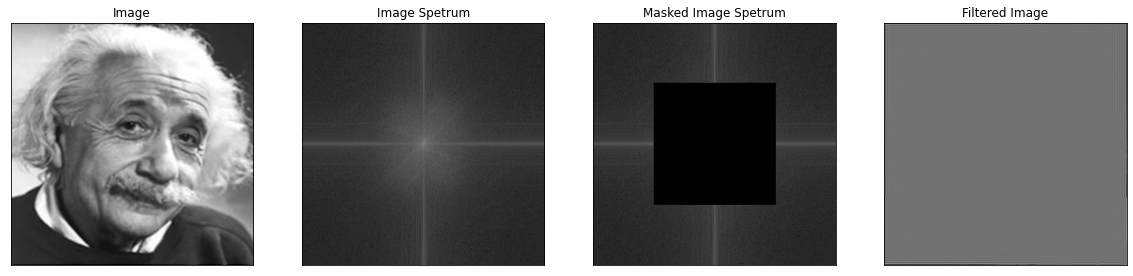

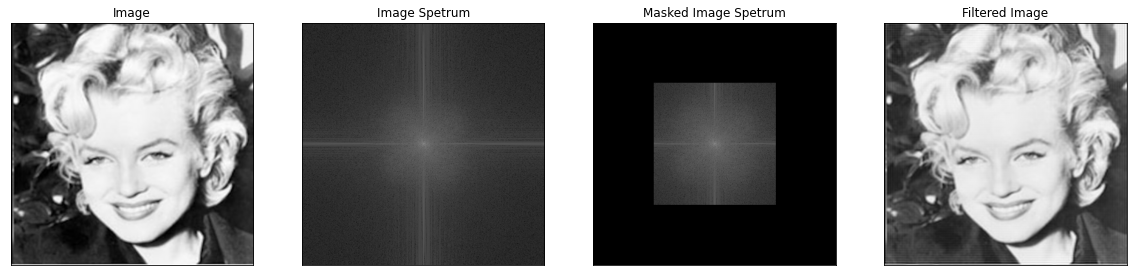

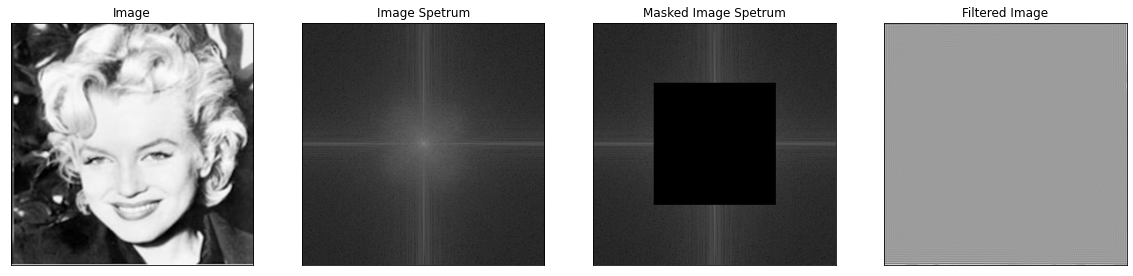

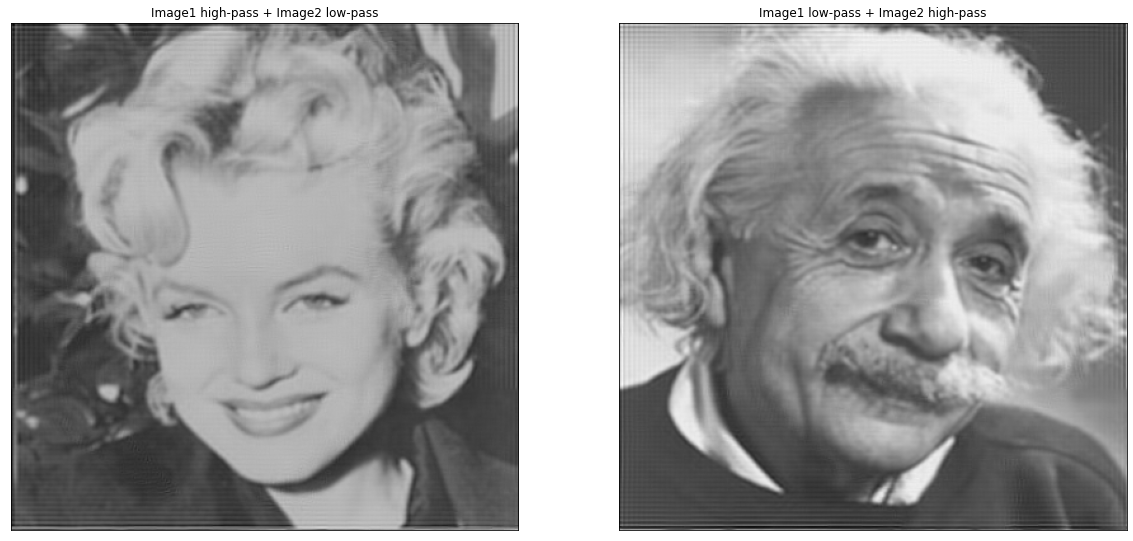

In [12]:
cutoff_frequency = 100

print("Image1 : ", img1.shape)
print("Image2 : ", img2.shape)

# ================================================================================
# ================================== Alignment - resizing
# ================================================================================
img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

img1_lowpass = freq_filtering(img1, 'low-pass', cutoff_frequency)
img1_highpass = freq_filtering(img1, 'high-pass', cutoff_frequency)

img2_lowpass = freq_filtering(img2, 'low-pass', cutoff_frequency)
img2_highpass = freq_filtering(img2, 'high-pass', cutoff_frequency)

img12_high_low =  img1_highpass + img2_lowpass
img12_low_high =  img1_lowpass + img2_highpass

img12_high_low = normalize(img12_high_low)
img12_low_high = normalize(img12_low_high)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow( img12_high_low, cmap='jet')
plt.title('Image1 high-pass + Image2 low-pass'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow( img12_low_high, cmap='jet')
plt.title('Image1 low-pass + Image2 high-pass'), plt.xticks([]), plt.yticks([])